# Chicago Car Crash
Car Crash Data from Chicago

## 1. 문제 정의
*가설: 날씨 조건이 교통사고 발생에 영향을 미친다. 특히, 나쁜 날씨 조건에서 교통사고가 더 자주 발생할 것으로 예상된다.

*분석을 통해 얻고자 하는 결과:
날씨 조건과 교통사고 발생 간의 관계확인하기, 어떤 종류의 날씨 조건이 교통사고 발생에 미치는 영향이 가장 큰지 식별하기, 날씨 조건이 교통사고 발생을 예측하는 데 유용한 정보를 제공하기

->날씨 조건을 기반으로 사고가 발생했는지 여부를 예측하고, 발생한 경우에는 어떤 종류의 날씨 조건이었는지를 분류하므로 이 가설은 분류문제로 볼 수 있음.

## 2. 데이터 EDA & 전처리

### 2-1.데이터 EDA

In [1]:
import pandas as pd
car_crash = pd.read_csv('../../Downloads/Traffic_Crashes_-_Crashes.csv')
car_crash.head().T


,0,1,2,3,4
CRASH_RECORD_ID,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,0481fc919b38f1572d4ba04b069766102d904a662ff096...
RD_NO,JG341943,JG338388,JG350008,JG338049,JG338431
CRASH_DATE_EST_I,NaN,NaN,NaN,NaN,NaN
CRASH_DATE,07/12/2023 03:05:00 PM,07/12/2023 05:50:00 PM,07/12/2023 02:00:00 PM,07/12/2023 07:05:00 AM,07/12/2023 06:30:00 PM
POSTED_SPEED_LIMIT,30,30,30,30,30
TRAFFIC_CONTROL_DEVICE,NO CONTROLS,NO CONTROLS,NO CONTROLS,TRAFFIC SIGNAL,NO CONTROLS
DEVICE_CONDITION,NO CONTROLS,NO CONTROLS,NO CONTROLS,UNKNOWN,NO CONTROLS
WEATHER_CONDITION,CLEAR,CLEAR,CLEAR,FREEZING RAIN/DRIZZLE,CLEAR
LIGHTING_CONDITION,DAYLIGHT,DAYLIGHT,DAYLIGHT,DAYLIGHT,DAYLIGHT
FIRST_CRASH_TYPE,TURNING,REAR END,OTHER OBJECT,REAR END,REAR END


In [2]:
car_crash.dtypes

CRASH_RECORD_ID                   object
RD_NO                             object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO       

In [3]:
car_crash.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

### "날씨가 안 좋을수록 교통사고 발생률이 높다"라는 가설을 검증하기 위해 필요한 변수

Weather Condition (날씨 상태): 교통사고가 발생한 날의 날씨 상태를 나타내는 변수  WEATHER_CONDITION

Injuries Total (총 부상자 수): 교통사고 발생 시 총 부상자 수를 나타내는 변수 이는 교통사고의 심각성을 나타내는 중요한 지표 중 하나임 .INJURIES_TOTAL

Posted Speed Limit (도로 속도 제한): 교통사고가 발생한 지역의 도로 속도 제한을 나타내는 변수 교통사고의 심각성과 관련이 있을 수 있음. POSTED_SPEED_LIMIT


In [4]:
car_crash.shape

(746498, 49)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 구조 확인
print("Data structure:")
print(car_crash.head())  # 데이터의 첫 5개 행 출력


Data structure:
                                     CRASH_RECORD_ID     RD_NO  \
0  012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...  JG341943   
1  01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...  JG338388   
2  02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...  JG350008   
3  03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...  JG338049   
4  0481fc919b38f1572d4ba04b069766102d904a662ff096...  JG338431   

  CRASH_DATE_EST_I              CRASH_DATE  POSTED_SPEED_LIMIT  \
0              NaN  07/12/2023 03:05:00 PM                  30   
1              NaN  07/12/2023 05:50:00 PM                  30   
2              NaN  07/12/2023 02:00:00 PM                  30   
3              NaN  07/12/2023 07:05:00 AM                  30   
4              NaN  07/12/2023 06:30:00 PM                  30   

  TRAFFIC_CONTROL_DEVICE DEVICE_CONDITION      WEATHER_CONDITION  \
0            NO CONTROLS      NO CONTROLS                  CLEAR   
1            NO CONTROLS      NO CONTROLS             

In [6]:
car_crash['WEATHER_CONDITION']

0                         CLEAR
1                         CLEAR
2                         CLEAR
3         FREEZING RAIN/DRIZZLE
4                         CLEAR
                  ...          
746493                    CLEAR
746494                    CLEAR
746495                    CLEAR
746496                    CLEAR
746497          CLOUDY/OVERCAST
Name: WEATHER_CONDITION, Length: 746498, dtype: object

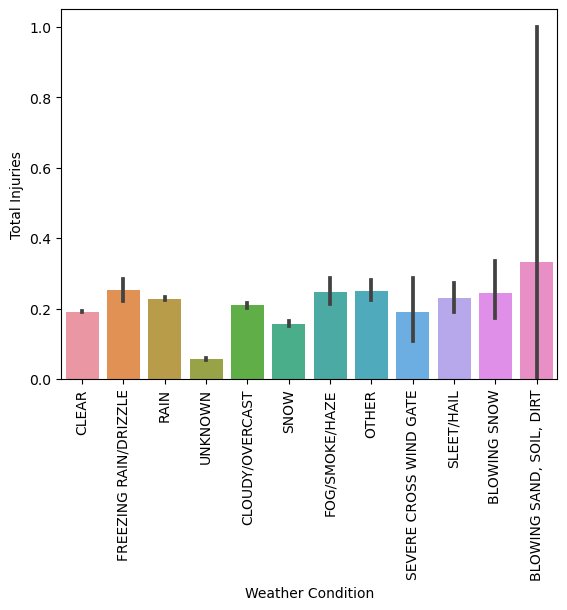

In [7]:
weather_conditions = car_crash['WEATHER_CONDITION'].unique()
sns.barplot(x='WEATHER_CONDITION', y='INJURIES_TOTAL', data=car_crash)
plt.xlabel('Weather Condition')
plt.ylabel('Total Injuries')
plt.xticks(range(len(weather_conditions)), weather_conditions, rotation=90)
plt.show()

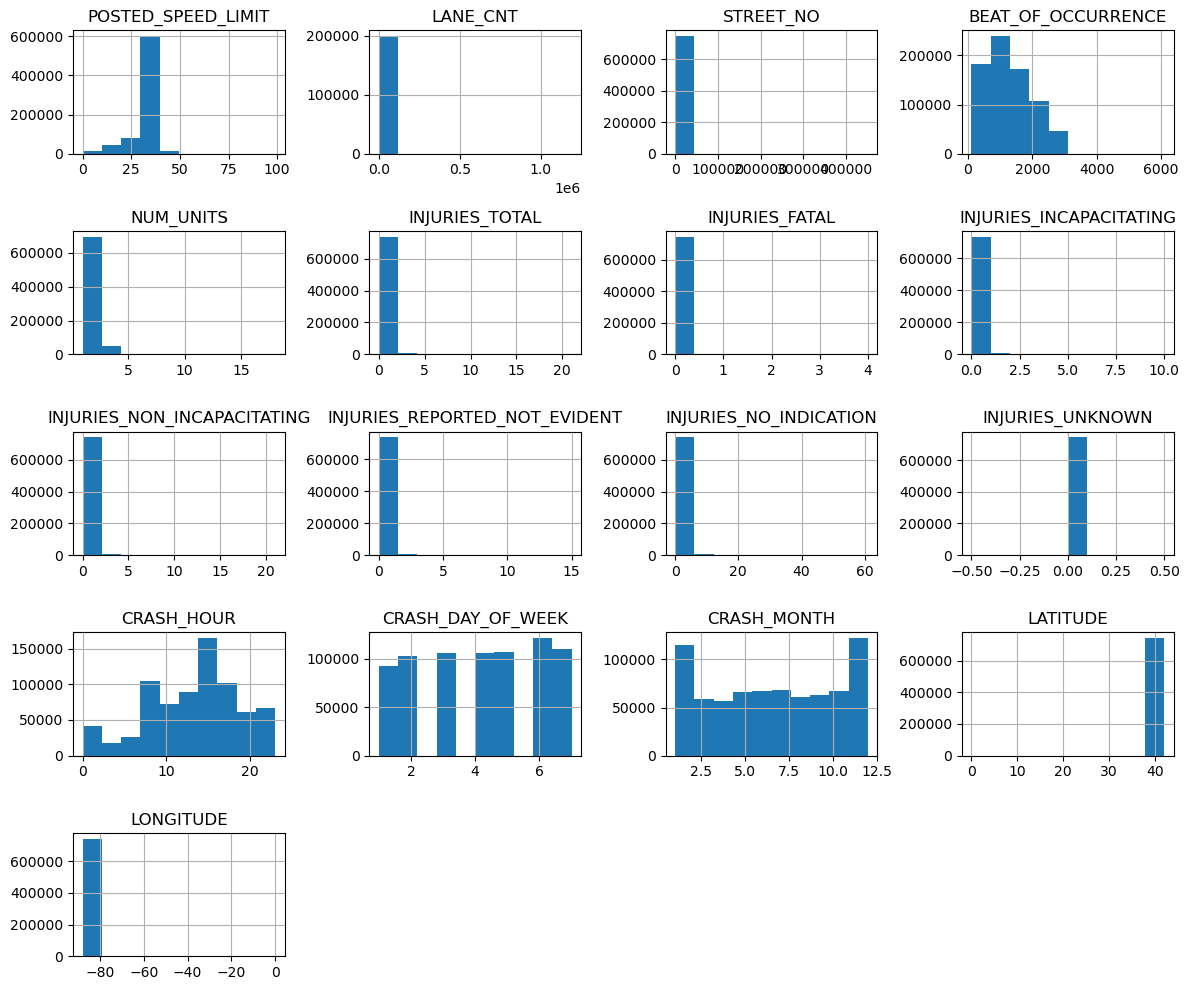

In [8]:
# 변수들의 분포 시각화
car_crash.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

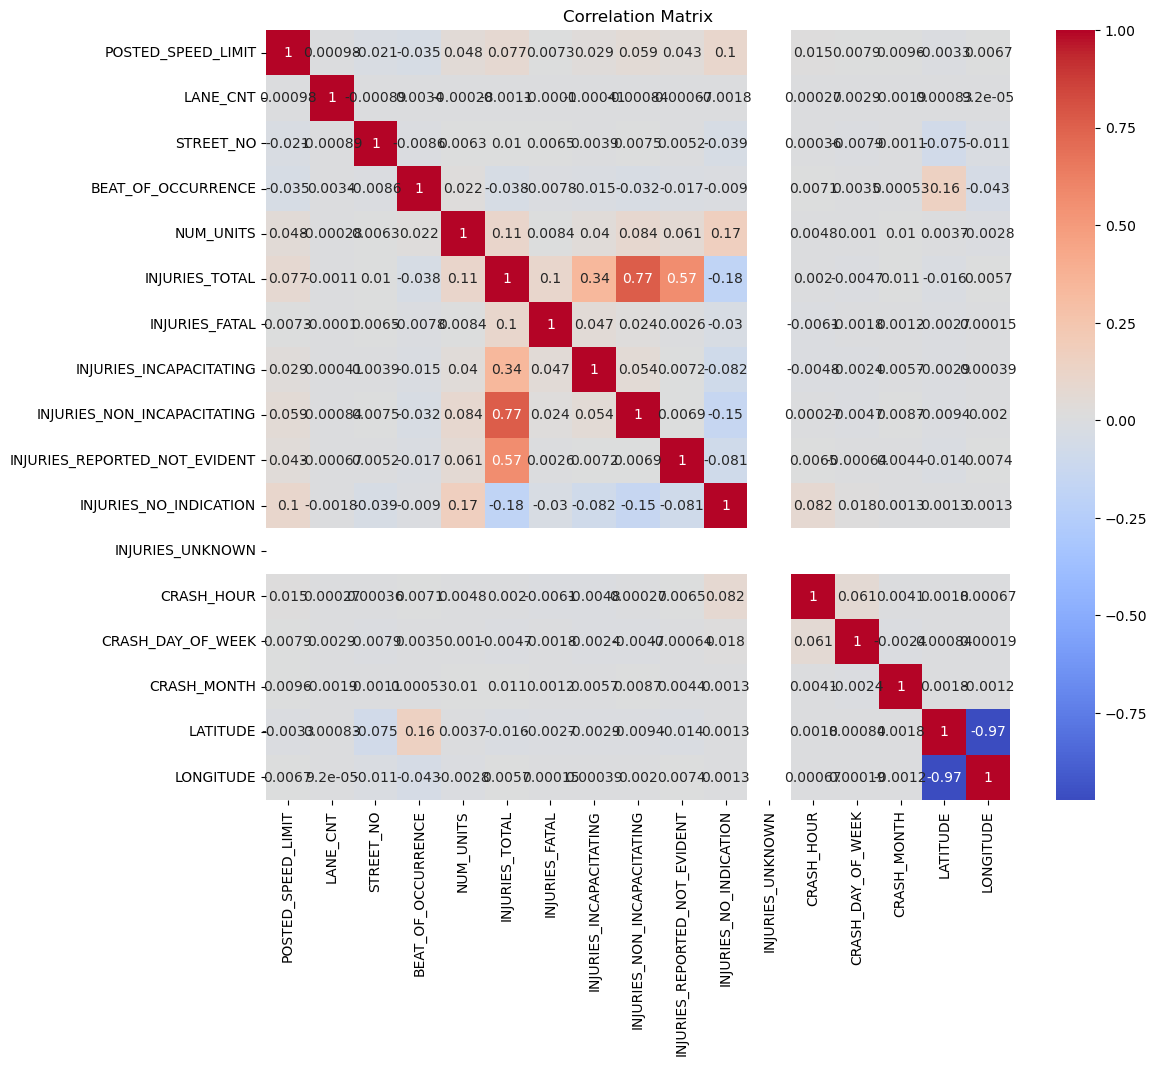

In [9]:
# 숫자형 데이터만 포함된 열 선택
numeric_columns = car_crash.select_dtypes(include=['int64', 'float64']).columns

# 상관 관계 분석 수행
correlation_matrix = car_crash[numeric_columns].corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### 2-2. 데이터 전처리

In [10]:
# 결측치 확인
car_crash.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                              4307
CRASH_DATE_EST_I                 690109
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         547494
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       21222
CRASH_TYPE                            0
INTERSECTION_RELATED_I           575368
NOT_RIGHT_OF_WAY_I               711724
HIT_AND_RUN_I                    513706
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [11]:
#INJURIES_TOTAL 결측치 제거

# 결측치가 있는 행 제거
car_crash_cleaned = car_crash.dropna(subset=['INJURIES_TOTAL'])

# 결측치가 있는 행 제거 (원본 데이터 변경)
car_crash.dropna(subset=['INJURIES_TOTAL'], inplace=True)


#WEATHER_CONDITION 문자열 / 범주형 데이터를 숫자로 인코딩

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# WEATHER_CONDITION 열에 있는 고유한 값 추출
unique_conditions = car_crash['WEATHER_CONDITION'].unique()

# LabelEncoder를 사용하여 각 고유한 값에 고유한 숫자를 할당
label_encoder.fit(unique_conditions)

# 변환된 값으로 원본 데이터 열을 대체
car_crash['WEATHER_CONDITION'] = label_encoder.transform(car_crash['WEATHER_CONDITION'])


## 3. 데이터 분석 기법 선정과 그 이유

데이터 분석 기법: 로지스틱 회귀 분석 기법

주어진 데이터를 표준화하고(Standardize the features), 
StatsModels를 사용하여 로지스틱 회귀 모델을 적합하고(Fit the logistic regression model), 
결과를 해석함(Interpret the results)

선정 이유:
1. 목표가 교통사고 발생 여부를 예측하는 이진 분류 문제이므로 로지스틱 회귀는 이러한 이진 분류 문제에 특히 적합하기 때문이다.

2. 변수 유형: 주어진 데이터에는 범주형 변수인 'WEATHER_CONDITION'과 'POSTED_SPEED_LIMIT'과 같은 독립 변수가 있다. 로지스틱 회귀는 범주형 변수와 연속형 변수를 모두 다룰 수 있으며, 이러한 변수 간의 관계를 파악하는 데 적합하기 때문이다.

3. 해석 용이성: 로지스틱 회귀 모델은 각 독립 변수의 계수를 해석하기 쉽기 때문이다. 계수의 해석은 해당 독립 변수가 종속 변수에 미치는 영향을 파악하는 데 도움이 된다.

4. 해석 가능성: 로지스틱 회귀 모델은 결과를 해석하기 쉽기 때문이다. 이 모델을 사용하면 각 독립 변수가 결과에 미치는 영향을 해석할 수 있다.

따라서 이러한 이유로 로지스틱 회귀 분석 기법을 선택하여 데이터를 분석하였다.

## 4. 데이터 분석 모델링 (모델 구현)

In [12]:
import statsmodels.api as sm

# 종속 변수 설정
car_crash['CRASH_OCCURRED'] = (car_crash['INJURIES_TOTAL'] > 0).astype(int)  # 부상자 수가 0보다 크면 1, 아니면 0으로 설정
y = car_crash['CRASH_OCCURRED']

# 독립 변수 설정
X = car_crash[['WEATHER_CONDITION', 'POSTED_SPEED_LIMIT']]  

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 해석
summary = result.summary()

Optimization terminated successfully.
         Current function value: 0.393578
         Iterations 6


In [13]:
# 결과 요약 리포트 출력
print(summary)

                           Logit Regression Results                           
Dep. Variable:         CRASH_OCCURRED   No. Observations:               744879
Model:                          Logit   Df Residuals:                   744876
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Feb 2024   Pseudo R-squ.:                 0.01085
Time:                        11:53:55   Log-Likelihood:            -2.9317e+05
converged:                       True   LL-Null:                   -2.9638e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0375      0.020   -149.821      0.000      -3.077      -2.998
WEATHER_CONDITION     -0.0417      0.001    -30.329      0.000      -0.044      -0.039
POSTED_SPEED_LIMIT  

In [14]:
# p-value 테이블 출력
p_values = result.pvalues
print(p_values)

const                  0.000000e+00
WEATHER_CONDITION     4.761914e-202
POSTED_SPEED_LIMIT     0.000000e+00
dtype: float64


## 5. 분석 모델 결과 해석 및 인사이트 제안

1. 결과 요약 리포트 해석:
* Pseudo R-squared: 약 0.011로, 모델이 설명하는 변동의 비율을 나타낸다. 낮은 값이므로 독립 변수로 설명되는 변동이 적음을 의미한다.
* 각 독립 변수의 계수(coef): 'WEATHER_CONDITION'과 'POSTED_SPEED_LIMIT'의 계수는 각각 -0.0417와 0.0456으로, 부호가 음수인 날씨 조건이 교통사고 발생 확률을 감소시키고, 속도 제한이 증가할수록 교통사고 발생 확률이 증가하는 것을 의미한다.
* p-value: 모든 변수의 p-value가 0.05보다 작으므로, 통계적으로 유의미한 결과라고 할 수 있다.

2. 인사이트 제안
* 날씨 조건: 날씨가 안전 운전에 영향을 준다는 것을 고려할 때, 특히 악천후 상황에서는 운전자들에게 주의를 환기시키고 안전운전 습관을 유지하도록 안내하는 교육 프로그램을 강화할 필요가 있다.
* 속도 제한: 속도 제한을 초과하는 운전으로 인한 교통사고 위험성이 높은 것으로 나타났으므로, 속도 위반에 대한 강력한 단속 및 벌금 부과, 교통안전 캠페인 등을 통해 운전자들의 주의를 끌 필요가 있다.
* 향후 조치: 모델에서 특정 변수의 계수가 양수인 경우, 해당 변수에 대한 추가 조치가 필요할 수 있다. 예를 들어, 'POSTED_SPEED_LIMIT'의 계수가 양수이므로, 도로의 속도 제한을 조정하여 안전운전을 촉진하는 방안을 검토할 필요가 있다.

이러한 분석을 통해 교통 안전 문제에 대한 이해를 높이고, 향후 정책 및 조치를 적절하게 제안할 수 있다.

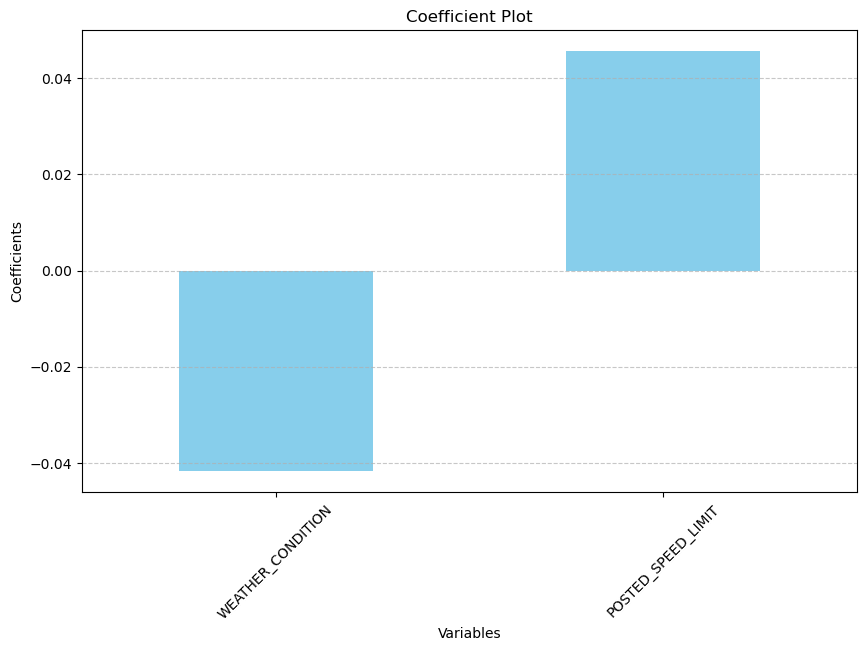

In [15]:
import matplotlib.pyplot as plt

# 각 독립 변수의 계수 추출
coefficients = result.params.drop('const')  # 상수항 제외

# 계수 플롯 시각화
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title('Coefficient Plot')
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


계수 플롯을 통해 각 독립 변수의 계수를 시각적으로 표시하여 해당 변수의 영향력을 비교할 수 있고, 
어떤 변수가 모델에 가장 큰 영향을 미치는지 빠르게 확인할 수 있다.
